# Car Price Prediction

In [1]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Preprocessing

In [3]:
data["CarName"].unique().shape

(147,)

In [4]:
data["Brand"] = data["CarName"].str.split(" ").str.get(0).str.lower()

In [5]:
data["Brand"].unique().shape

(27,)

In [6]:
data["CarName"].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [7]:
data["Brand"].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: Brand, dtype: object

In [8]:
data["Brand"] = data["Brand"].replace({
    "maxda" : "mazda",
    "vokswagen" : "volkswagen",
    "toyouta" : "toyota",
    "porcshce" : "porshce"
})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

# Spliting

In [13]:
x = data.drop(columns=["price", "CarName", "car_ID"], axis=1)
y = data["price"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [15]:
x_train.sample(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand
129,1,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,porsche
196,-2,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,volvo
160,0,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,...,98,2bbl,3.19,3.03,9.0,70,4800,38,47,toyota
66,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200,31,39,mazda
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,volvo


In [16]:
x_train.columns.to_list()

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'Brand']

# Visualization

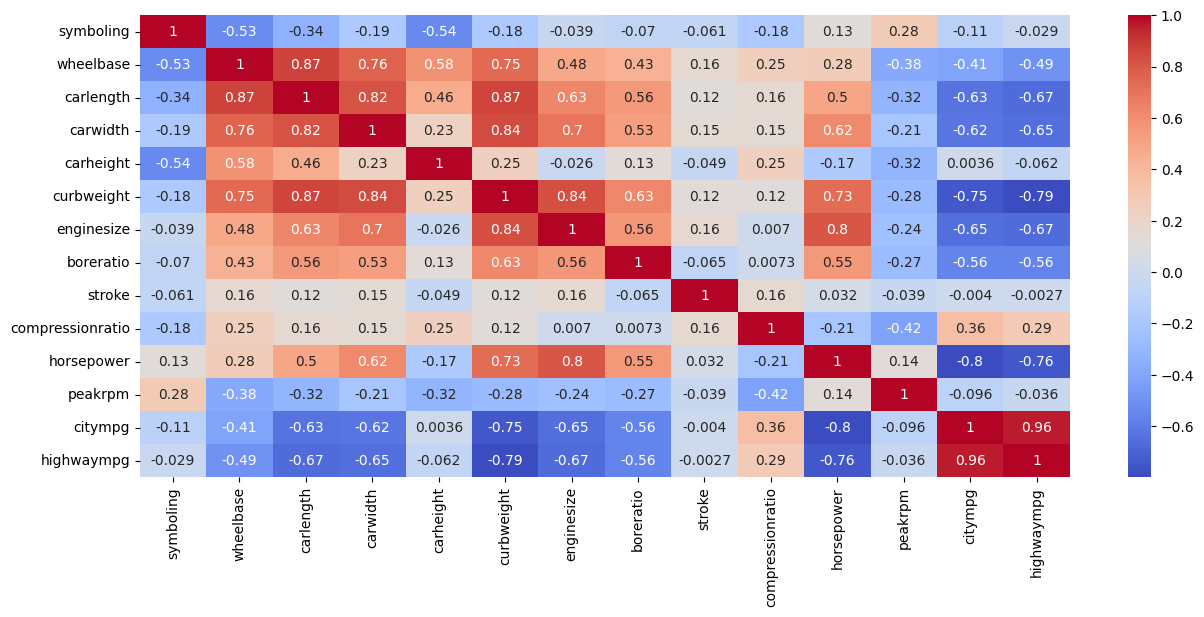

In [17]:
plt.figure(figsize=(15, 6))
sns.heatmap(x_train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [18]:
columns = x_train.select_dtypes(np.number).columns.to_list()
columns

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

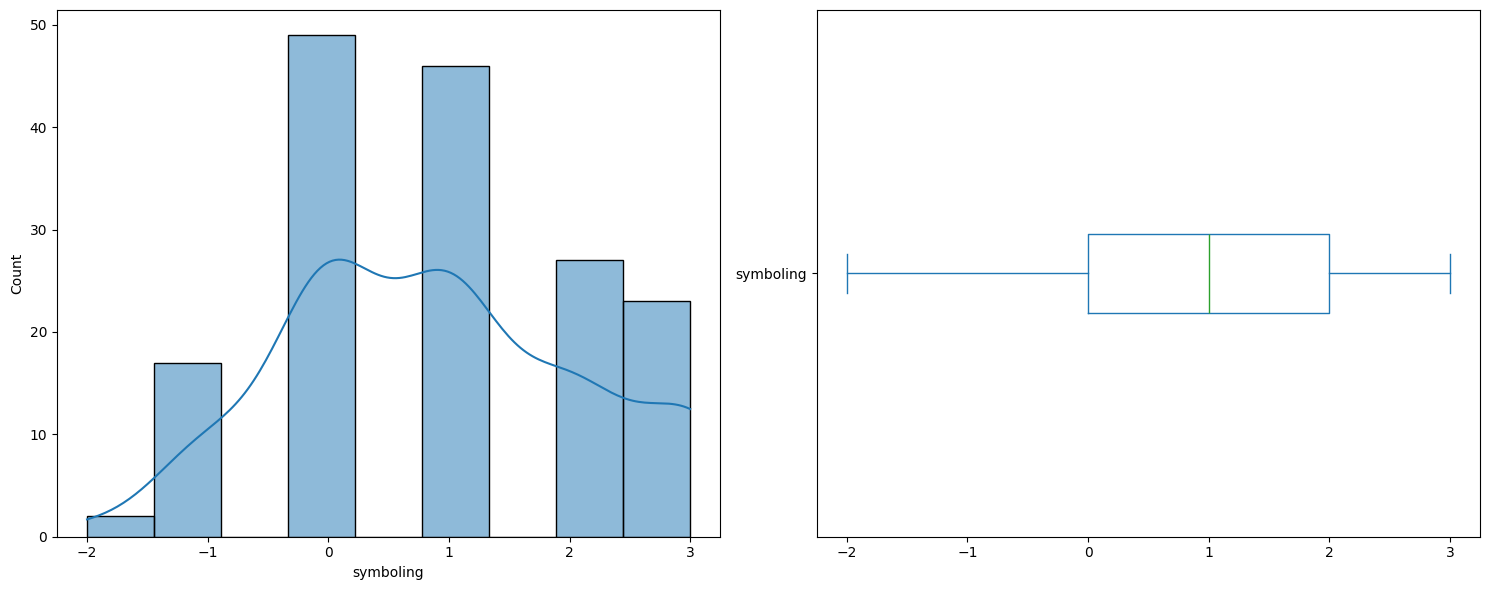

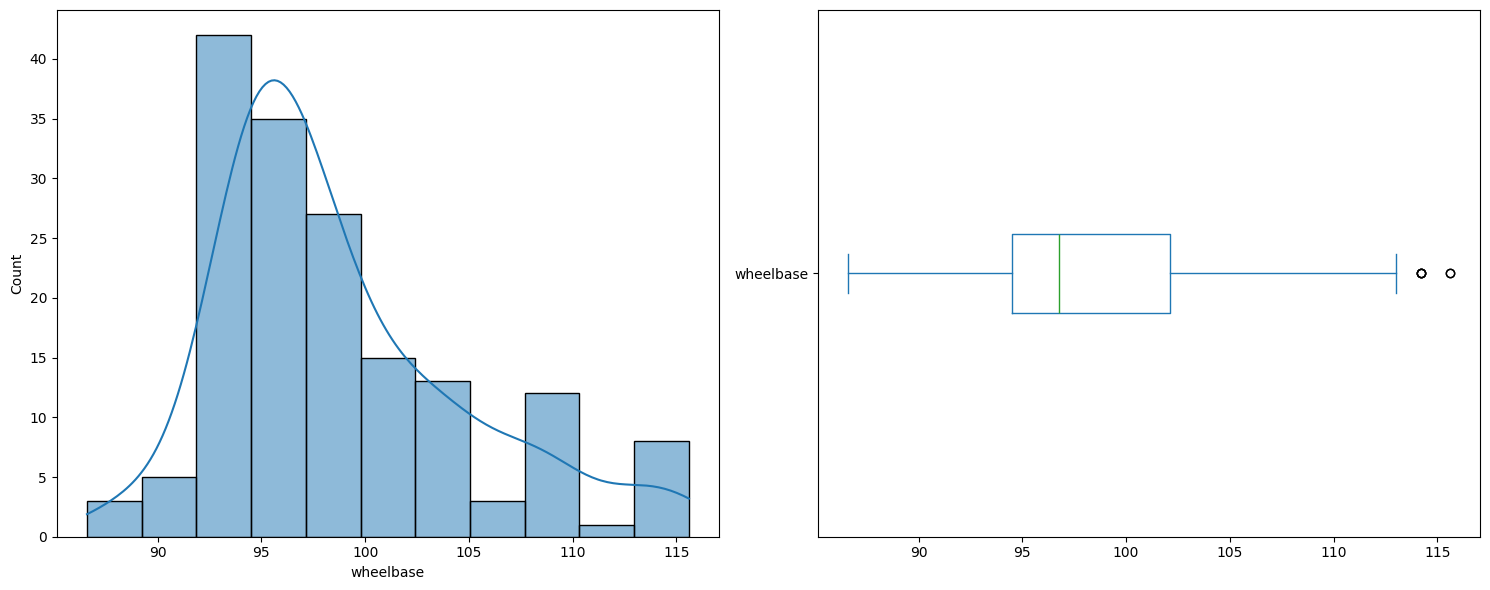

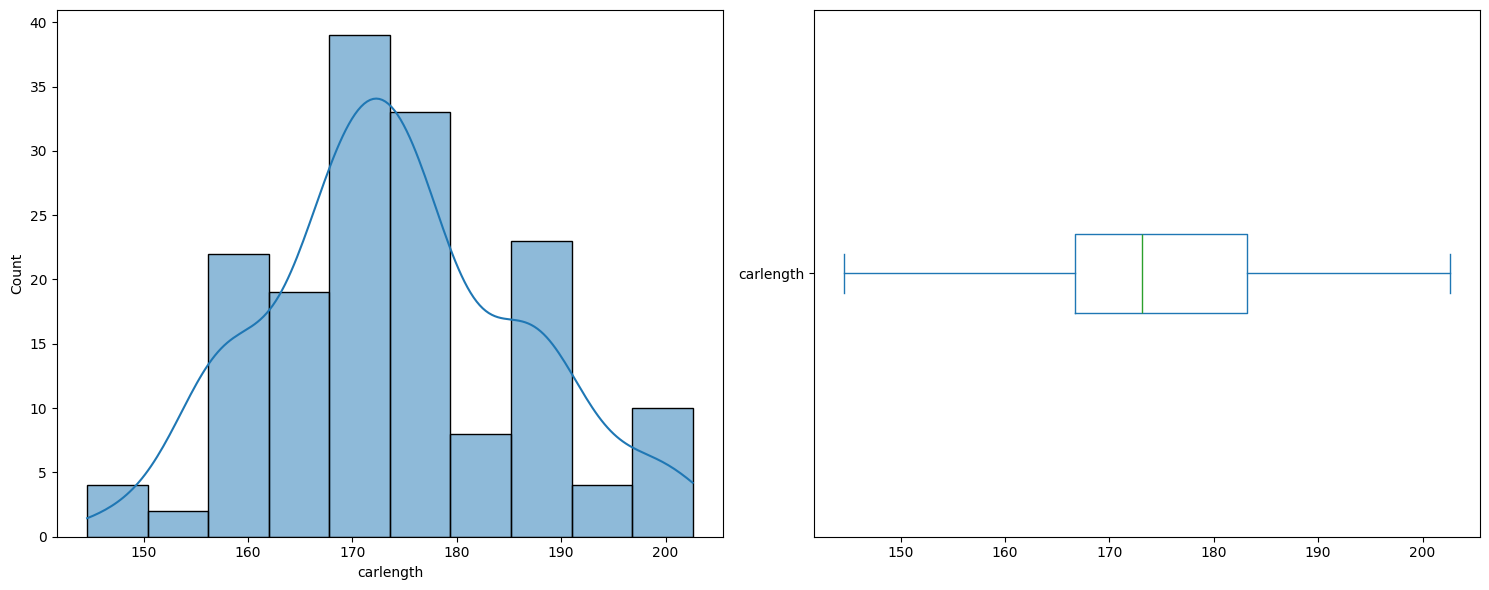

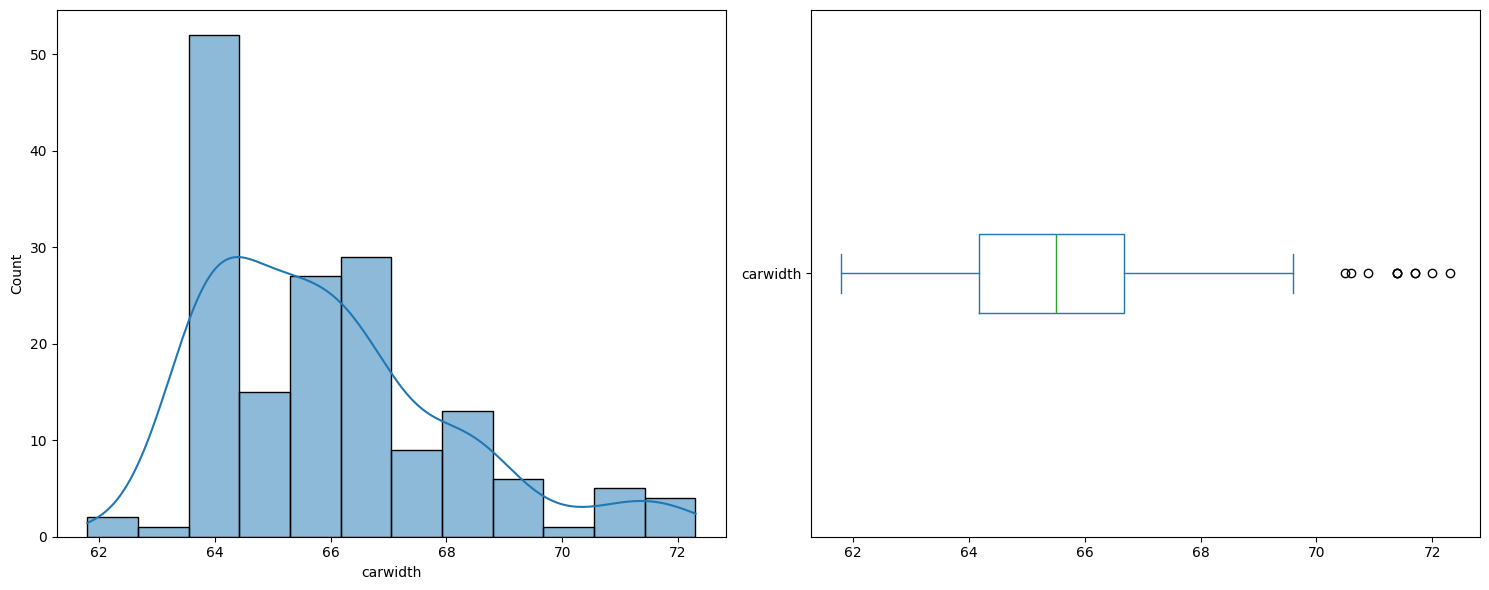

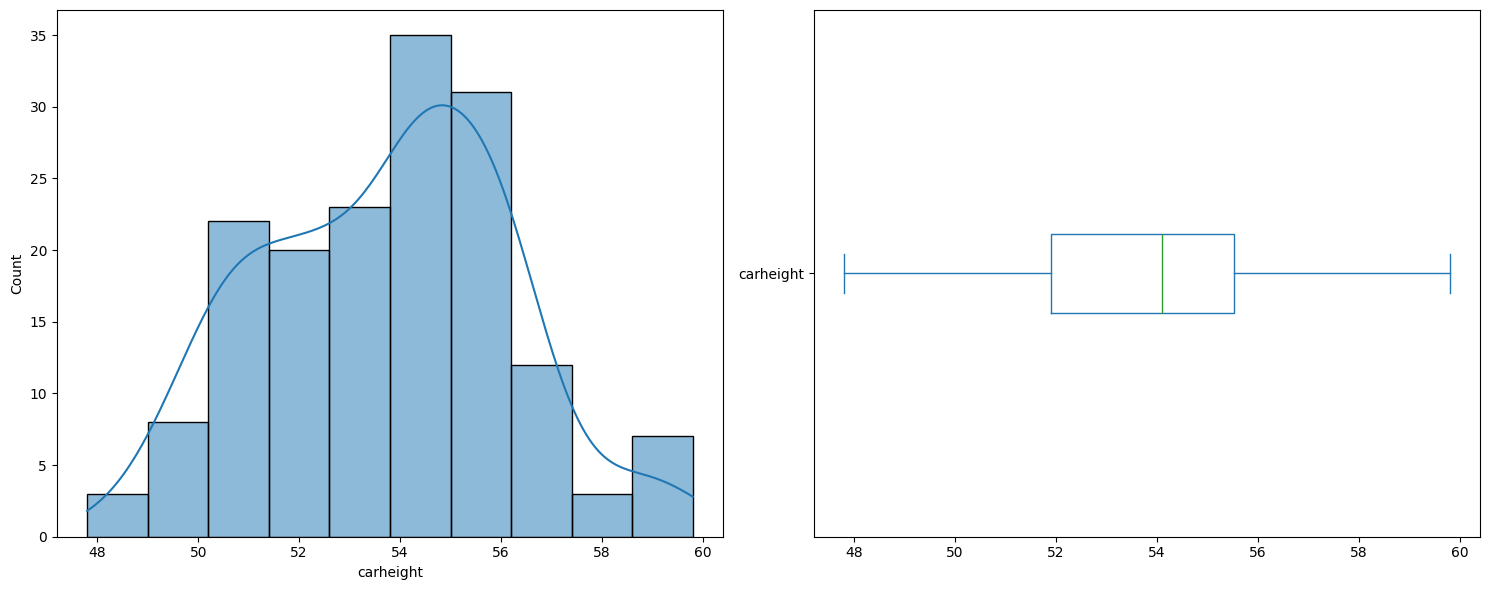

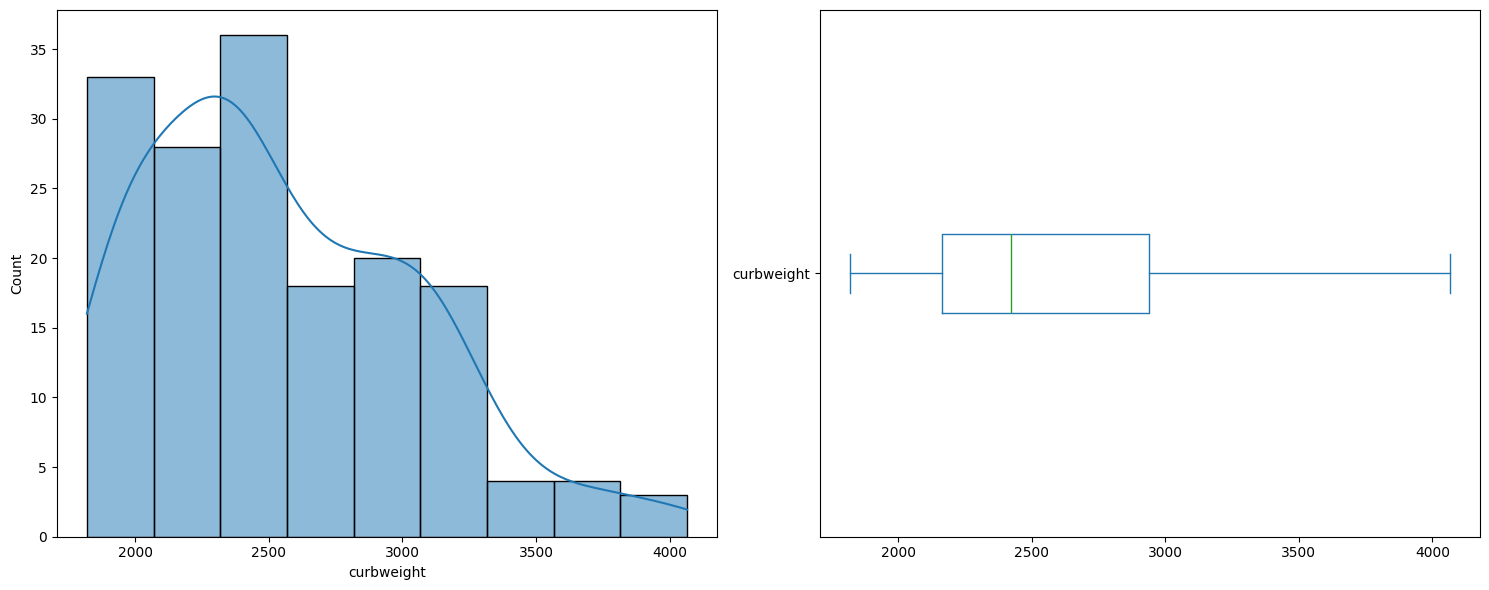

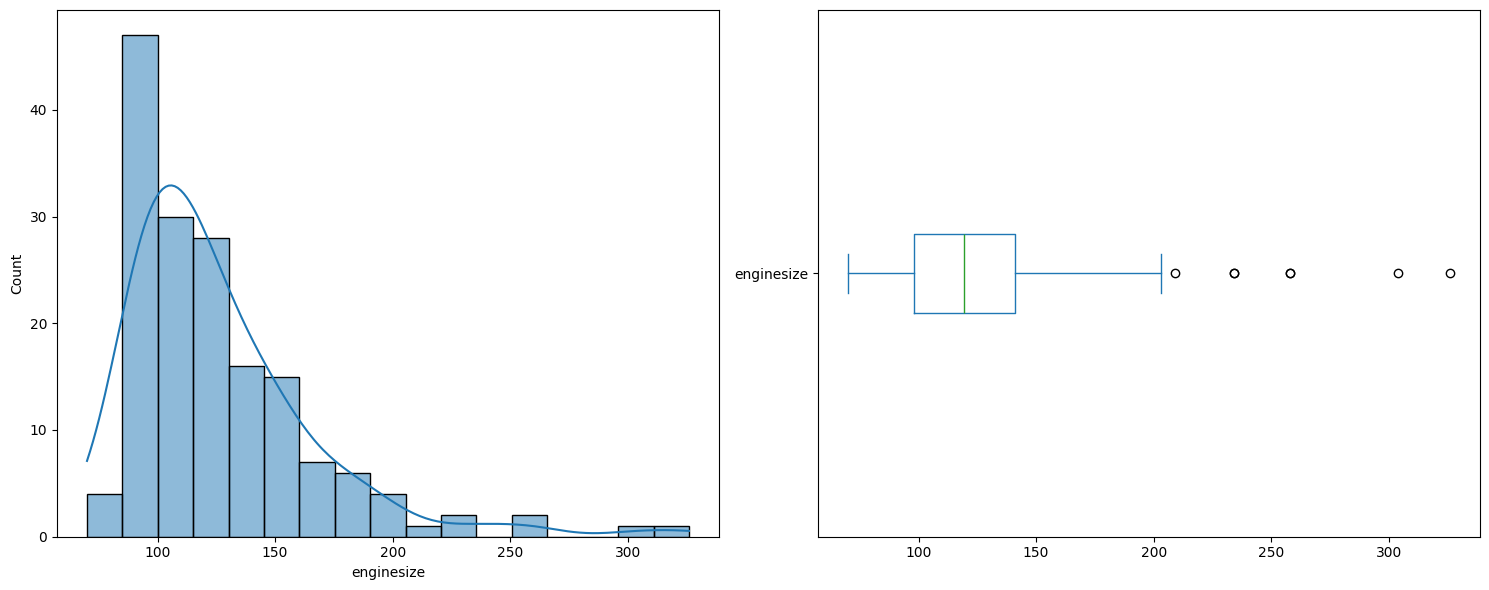

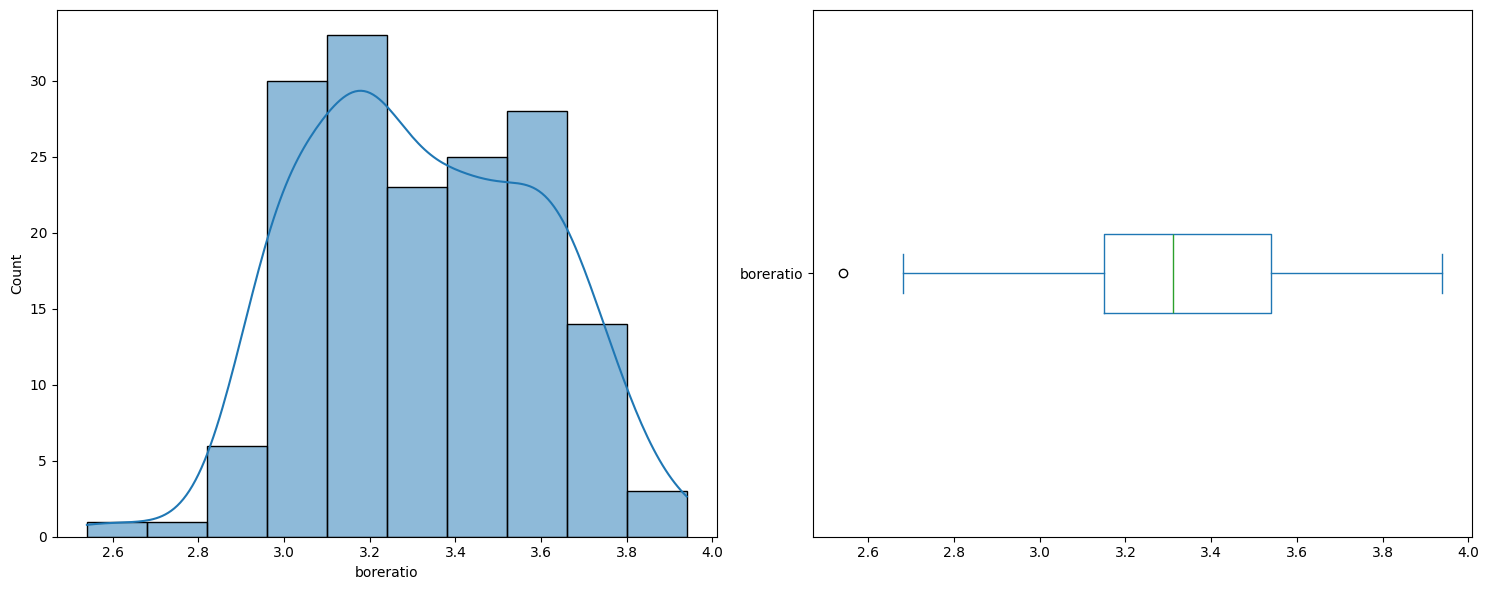

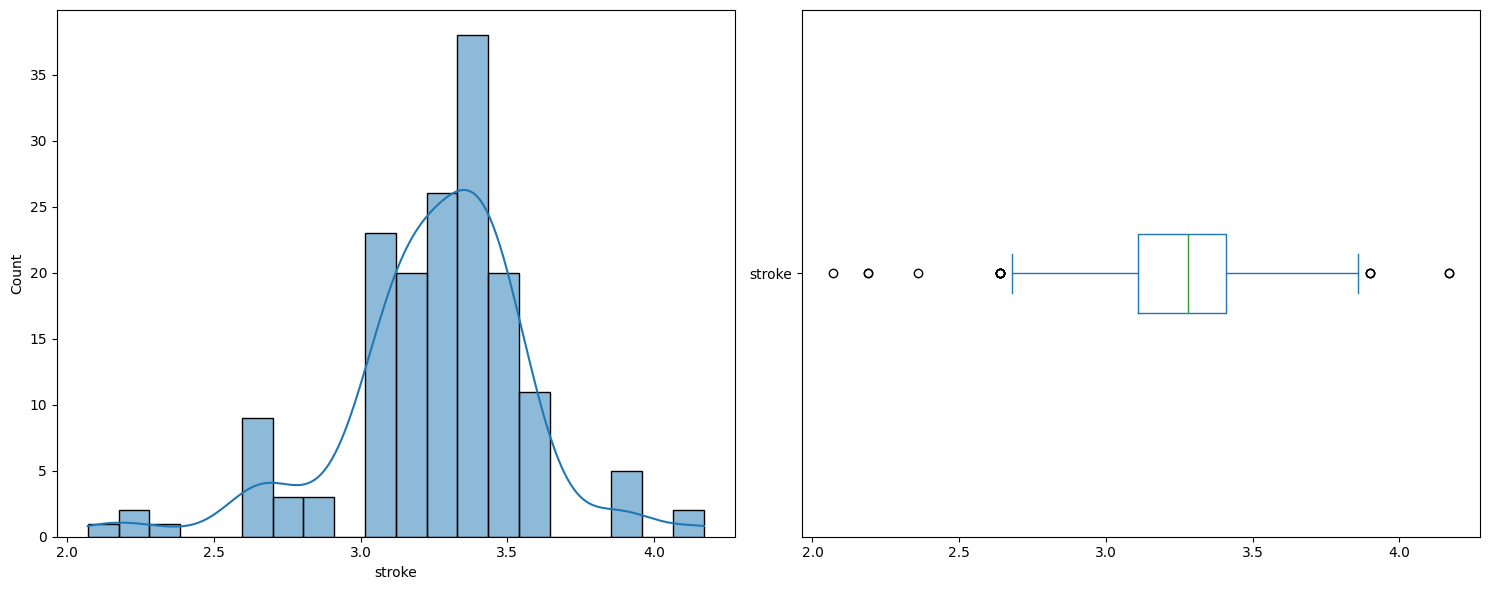

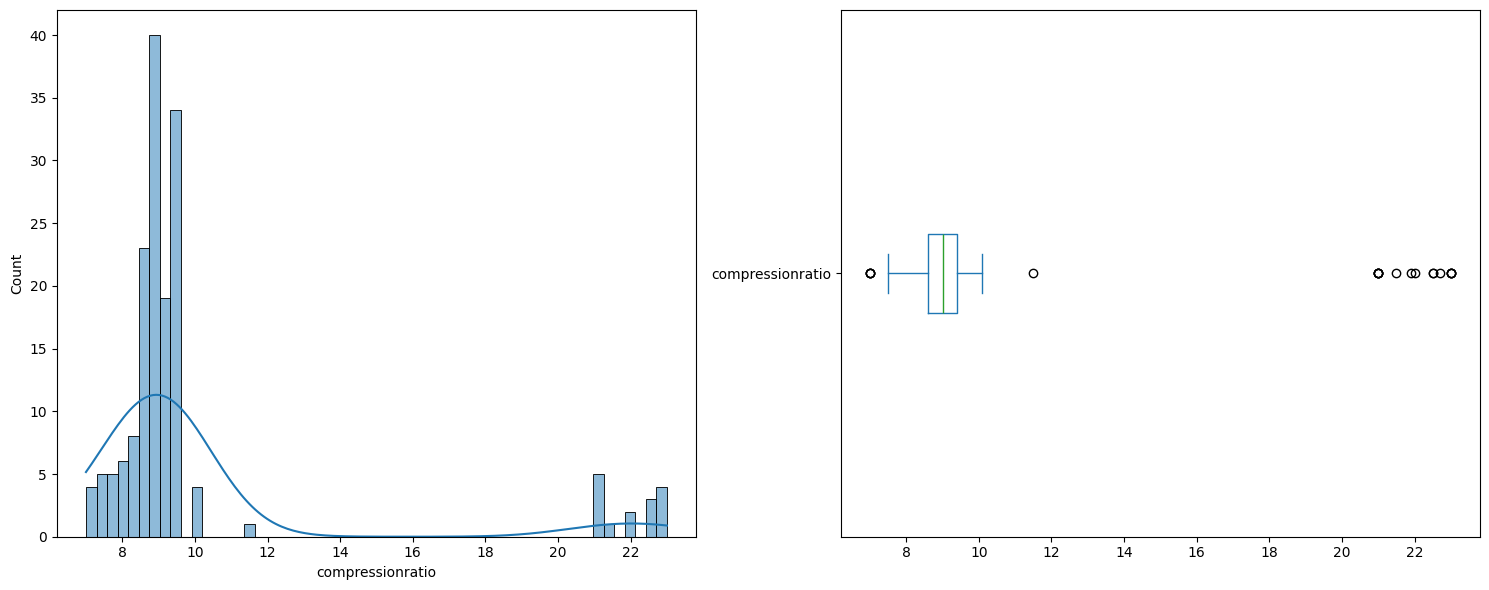

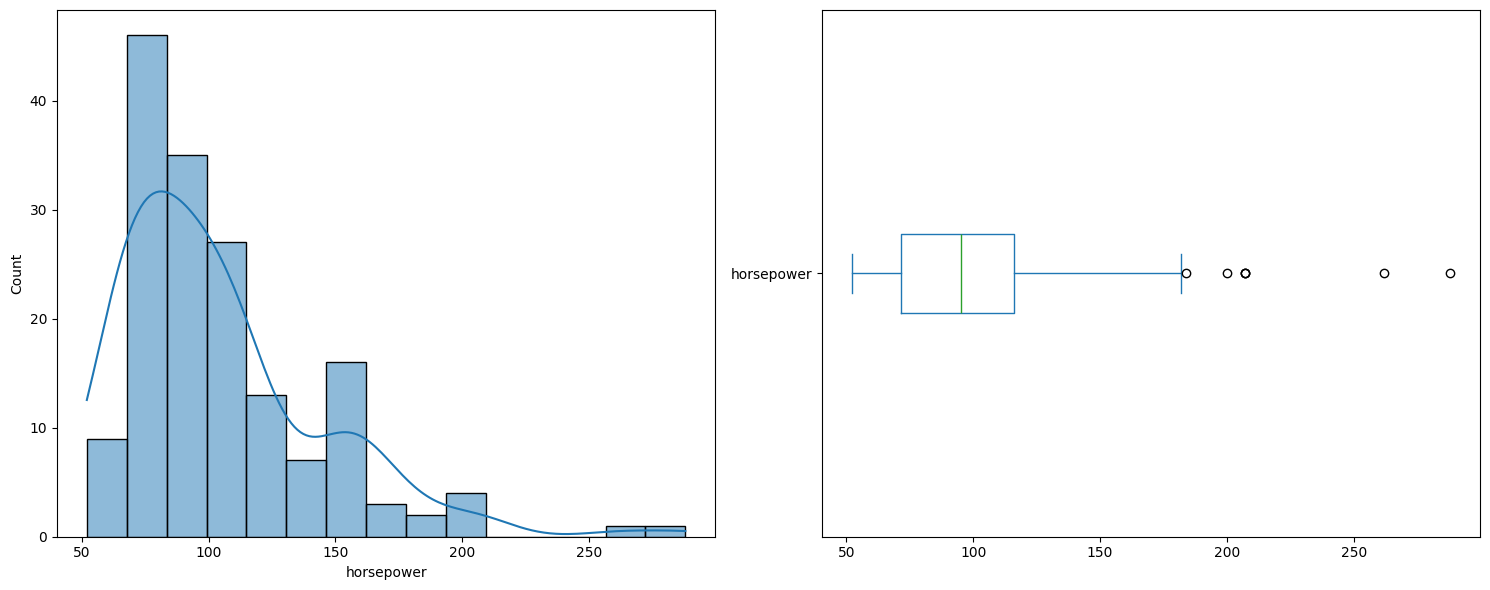

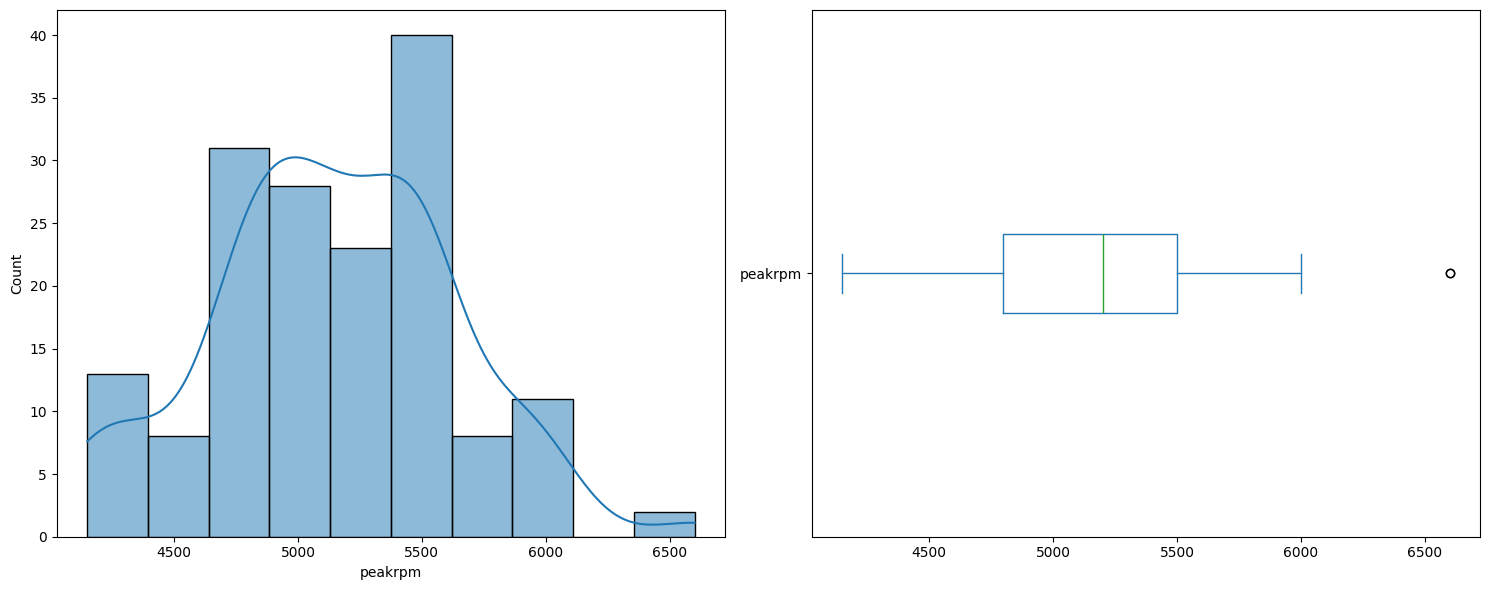

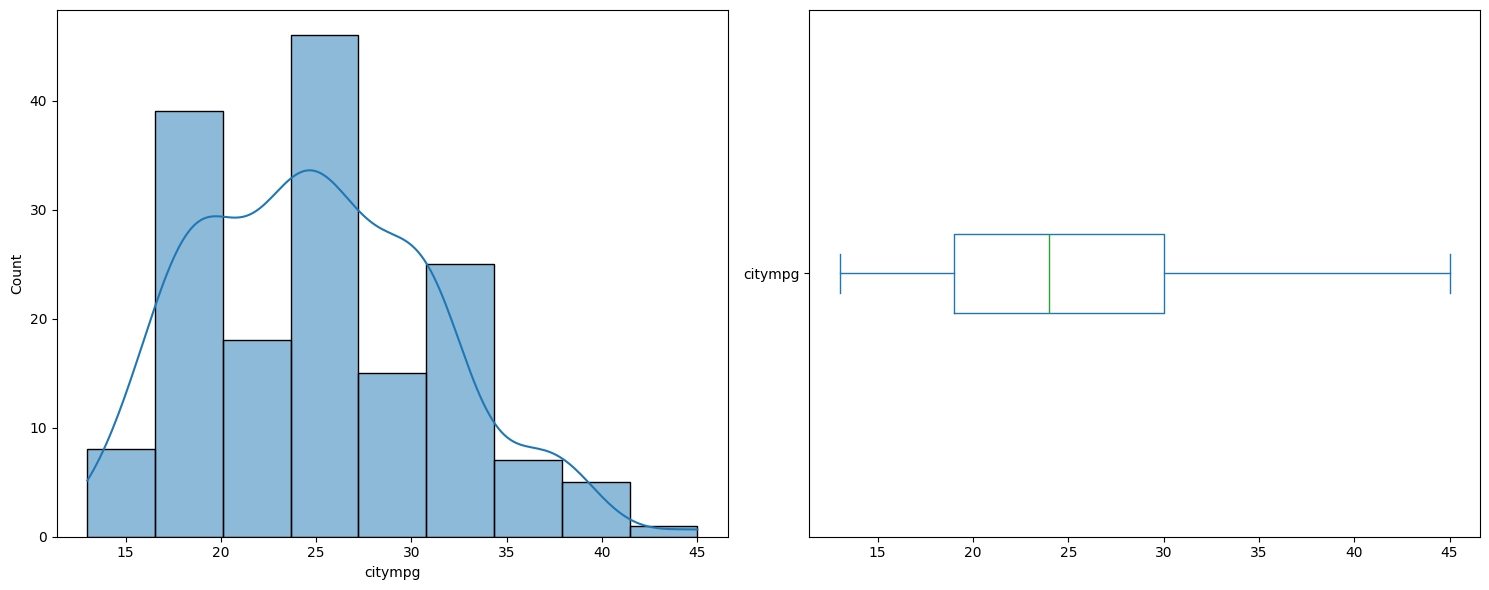

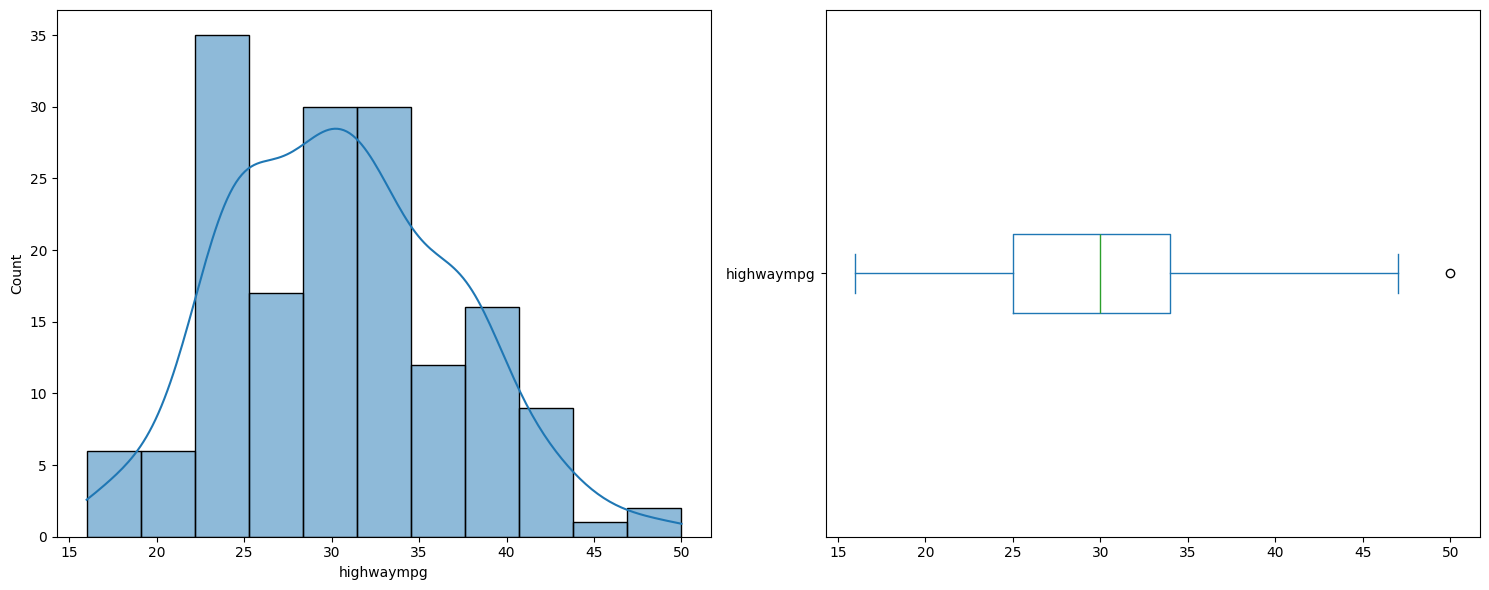

In [19]:
for i, cols in enumerate(columns):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1) 
    sns.histplot(x_train[cols], kde=True)

    plt.subplot(1, 2, 2)
    x_train[cols].plot.box(vert=False)

    plt.tight_layout()
    plt.show()

# Skewness

In [20]:
x_train.skew(numeric_only=True)

symboling           0.148352
wheelbase           1.011049
carlength           0.236735
carwidth            1.014691
carheight           0.028154
curbweight          0.712433
enginesize          2.049555
boreratio           0.050359
stroke             -0.755037
compressionratio    2.737494
horsepower          1.546398
peakrpm             0.067295
citympg             0.419117
highwaympg          0.289597
dtype: float64

In [21]:
# Select Categorical Columns Transform Into An Encoding
cat_col = x_train.select_dtypes("O").columns.to_list()

for i in ["cylindernumber", "doornumber"]:
    if i in cat_col:
        cat_col.remove(i)
        
cat_col

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'Brand']

# Column Transform

In [22]:
data["cylindernumber"].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [23]:
data["doornumber"].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [24]:
rank = ["two", "three", "four", "five", "six", "eight", "twelve"]
rank2 = ["two", "four"]

preprocessing = ColumnTransformer([
    ("cat1", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_col),
    ("cat2", OrdinalEncoder(categories=[rank]), ["cylindernumber"]),
    ("cat3", OrdinalEncoder(categories=[rank2]), ["doornumber"])], remainder='passthrough')

# Model

# Linear Regression

In [25]:
pipe = Pipeline([
    ("preprocess", preprocessing),
    ("model", LinearRegression())
])

In [26]:
pipe.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
train_prediction = pipe.predict(x_train)
test_prediction = pipe.predict(x_test)

In [28]:
train_residuals = y_train - train_prediction
test_residuals = y_test - test_prediction

In [29]:
x_test.shape, y_test.shape

((41, 24), (41,))

In [30]:
train_mse = mean_squared_error(train_prediction, y_train)
train_mae = mean_absolute_error(train_prediction, y_train)
train_rmse = root_mean_squared_error(train_prediction, y_train)
train_r2_score = r2_score(train_prediction, y_train)

test_mse = mean_squared_error(test_prediction, y_test)
test_mae = mean_absolute_error(test_prediction, y_test)
test_rmse = root_mean_squared_error(test_prediction, y_test)
test_r2_score = r2_score(test_prediction, y_test)

print(f"Train MSE: {train_mse:.2f}% | Test MSE: {test_mse:.2f}%")
print(f"Train MAE: {train_mae:.2f}% | Test MAE: {test_mae:.2f}%")
print(f"Train RMSE: {train_rmse:.2f}% | Test RMSE: {test_rmse:.2f}%")
print(f"Train R2 SCORE: {train_r2_score:.2f}% | Test R2 SCORE: {test_r2_score:.2f}%")

Train MSE: 1582289.64% | Test MSE: 7982524.55%
Train MAE: 934.52% | Test MAE: 1905.69%
Train RMSE: 1257.89% | Test RMSE: 2825.34%
Train R2 SCORE: 0.97% | Test R2 SCORE: 0.91%


In [31]:
score = round(pipe.score(x_test, y_test) * 100, 2)
print(f"{score}%")

89.89%


# Lasso Regression

In [32]:
pipe_lasso = Pipeline([
    ("preprocess", preprocessing),
    ("model", Lasso(alpha=1.0))
])

In [33]:
pipe_lasso.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
lasso_train_prediction = pipe_lasso.predict(x_train)
lasso_test_prediction = pipe_lasso.predict(x_test)

In [35]:
lasso_train_residuals = y_train - lasso_train_prediction
lasso_test_residuals = y_test - lasso_test_prediction

In [36]:
train_mse = mean_squared_error(lasso_train_prediction, y_train)
train_mae = mean_absolute_error(lasso_train_prediction, y_train)
train_rmse = root_mean_squared_error(lasso_train_prediction, y_train)
train_r2_score = r2_score(lasso_train_prediction, y_train)

test_mse = mean_squared_error(lasso_test_prediction, y_test)
test_mae = mean_absolute_error(lasso_test_prediction, y_test)
test_rmse = root_mean_squared_error(lasso_test_prediction, y_test)
test_r2_score = r2_score(lasso_test_prediction, y_test)

print(f"Train MSE: {train_mse:.2f}% | Test MSE: {test_mse:.2f}%")
print(f"Train MAE: {train_mae:.2f}% | Test MAE: {test_mae:.2f}%")
print(f"Train RMSE: {train_rmse:.2f}% | Test RMSE: {test_rmse:.2f}%")
print(f"Train R2 SCORE: {train_r2_score:.2f}% | Test R2 SCORE: {test_r2_score:.2f}%")

Train MSE: 1600539.01% | Test MSE: 8406933.64%
Train MAE: 943.32% | Test MAE: 1936.50%
Train RMSE: 1265.12% | Test RMSE: 2899.47%
Train R2 SCORE: 0.97% | Test R2 SCORE: 0.90%


In [37]:
score = round(pipe_lasso.score(x_test, y_test) * 100, 2)
print(f"{score}%")

89.35%


# Ridge Regression

In [38]:
pipe_ridge = Pipeline([
    ("preprocess", preprocessing),
    ("model", Ridge(alpha=1.0))
])

In [39]:
pipe_ridge.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
ridge_train_prediction = pipe_ridge.predict(x_train)
ridge_test_prediction = pipe_ridge.predict(x_test)

In [41]:
ridge_train_residuals = y_train - ridge_train_prediction
ridge_test_residuals = y_test - ridge_test_prediction

In [42]:
train_mse = mean_squared_error(ridge_train_prediction, y_train)
train_mae = mean_absolute_error(ridge_train_prediction, y_train)
train_rmse = root_mean_squared_error(ridge_train_prediction, y_train)
train_r2_score = r2_score(ridge_train_prediction, y_train)

test_mse = mean_squared_error(ridge_test_prediction, y_test)
test_mae = mean_absolute_error(ridge_test_prediction, y_test)
test_rmse = root_mean_squared_error(ridge_test_prediction, y_test)
test_r2_score = r2_score(ridge_test_prediction, y_test)

print(f"Train MSE: {train_mse:.2f}% | Test MSE: {test_mse:.2f}%")
print(f"Train MAE: {train_mae:.2f}% | Test MAE: {test_mae:.2f}%")
print(f"Train RMSE: {train_rmse:.2f}% | Test RMSE: {test_rmse:.2f}%")
print(f"Train R2 SCORE: {train_r2_score:.2f}% | Test R2 SCORE: {test_r2_score:.2f}%")

Train MSE: 2116651.15% | Test MSE: 8570378.51%
Train MAE: 1099.91% | Test MAE: 2036.50%
Train RMSE: 1454.87% | Test RMSE: 2927.52%
Train R2 SCORE: 0.96% | Test R2 SCORE: 0.90%


In [43]:
score = round(pipe_ridge.score(x_test, y_test) * 100, 2)
print(f"{score}%")

89.14%


# After Train Visualization

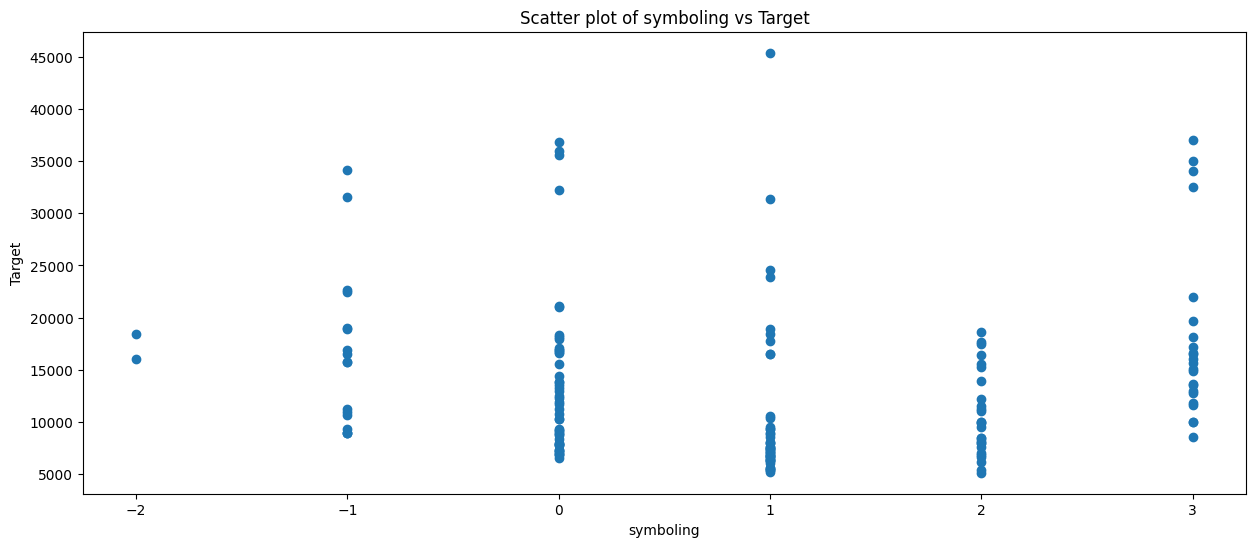

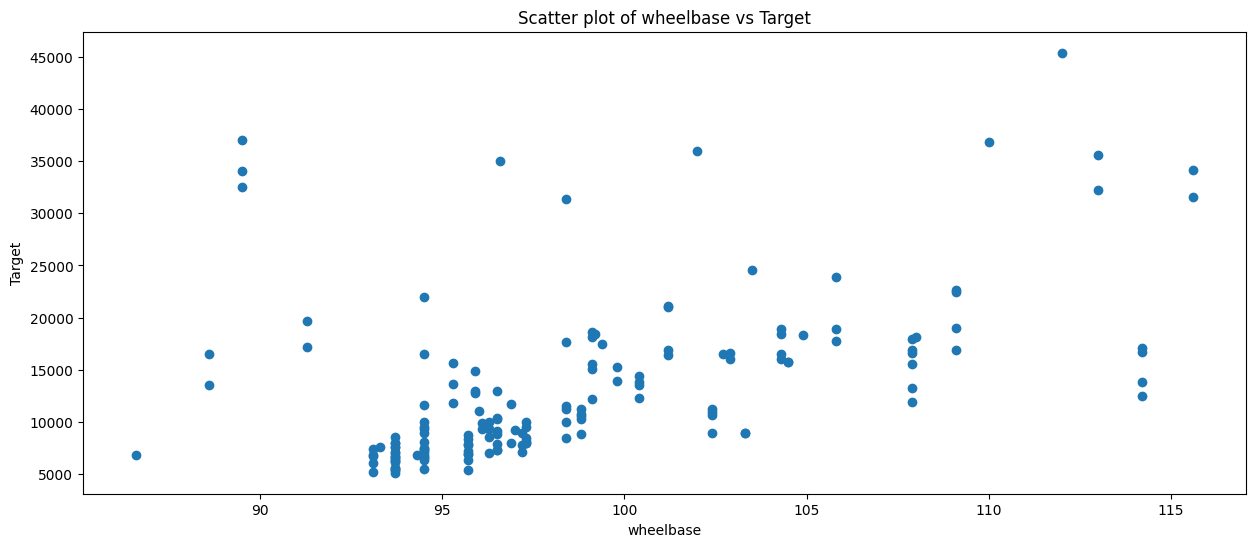

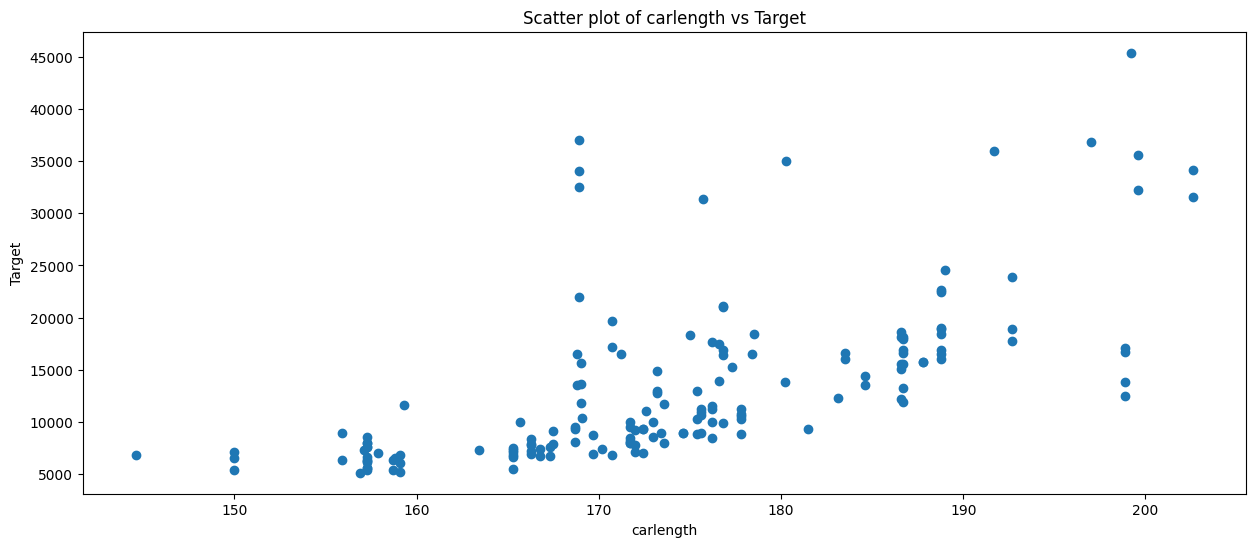

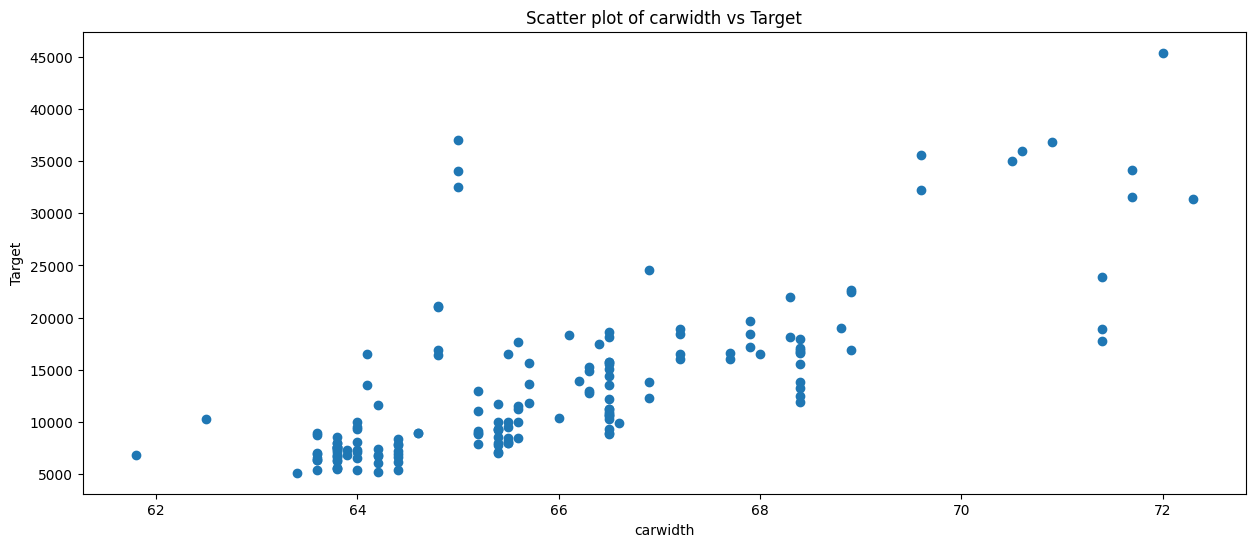

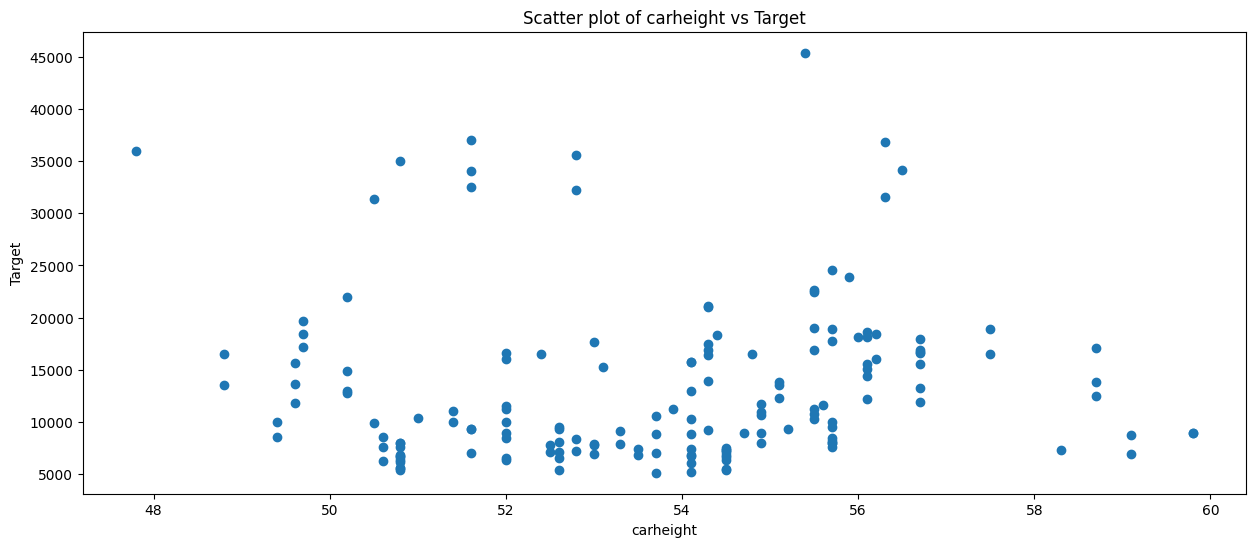

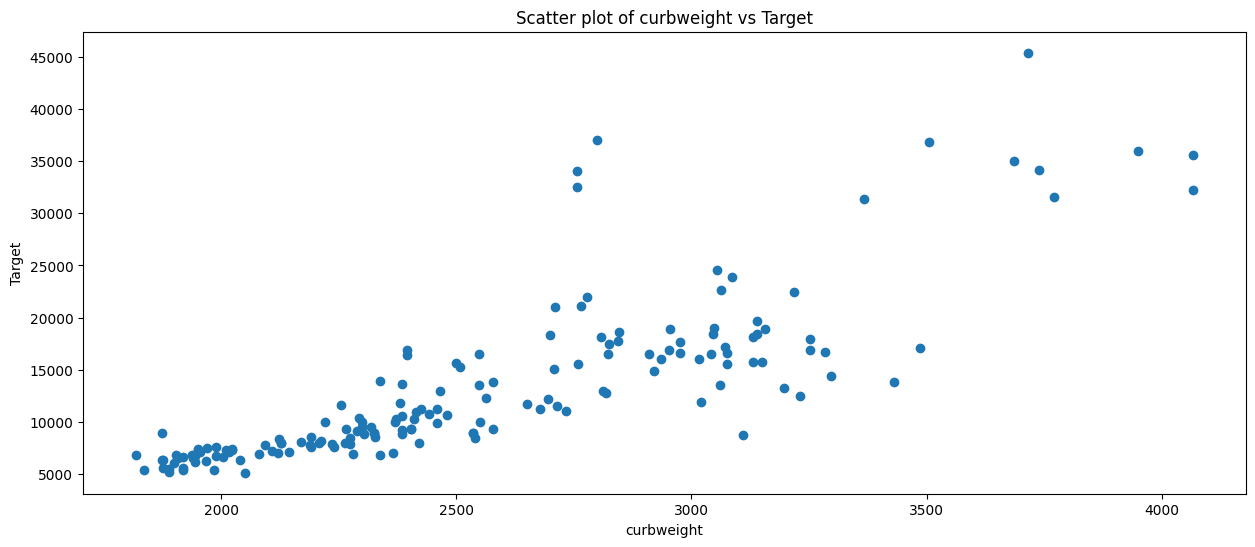

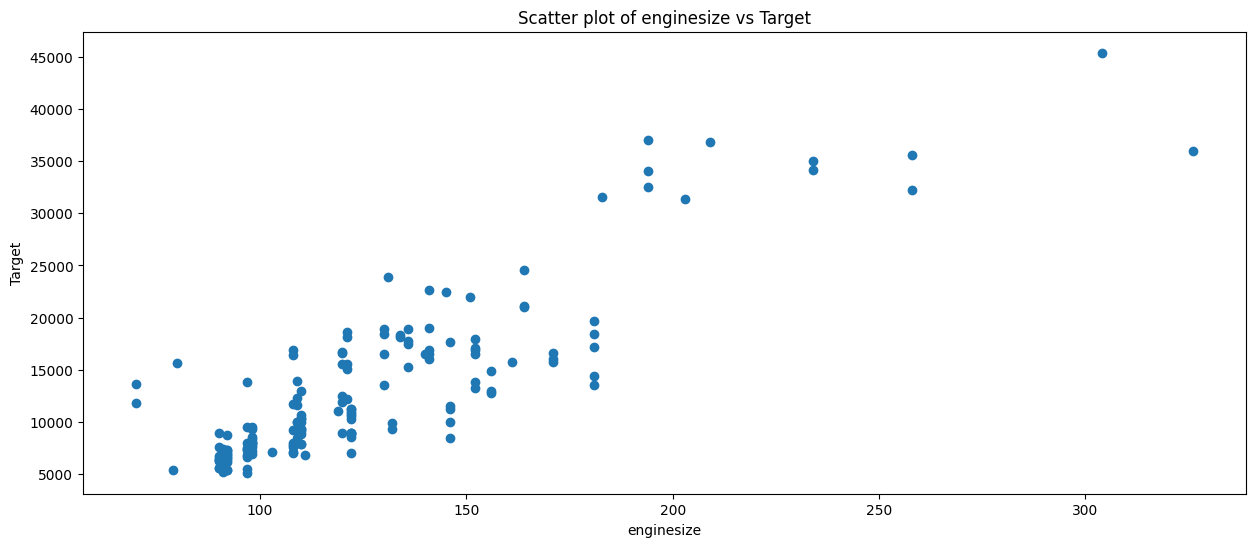

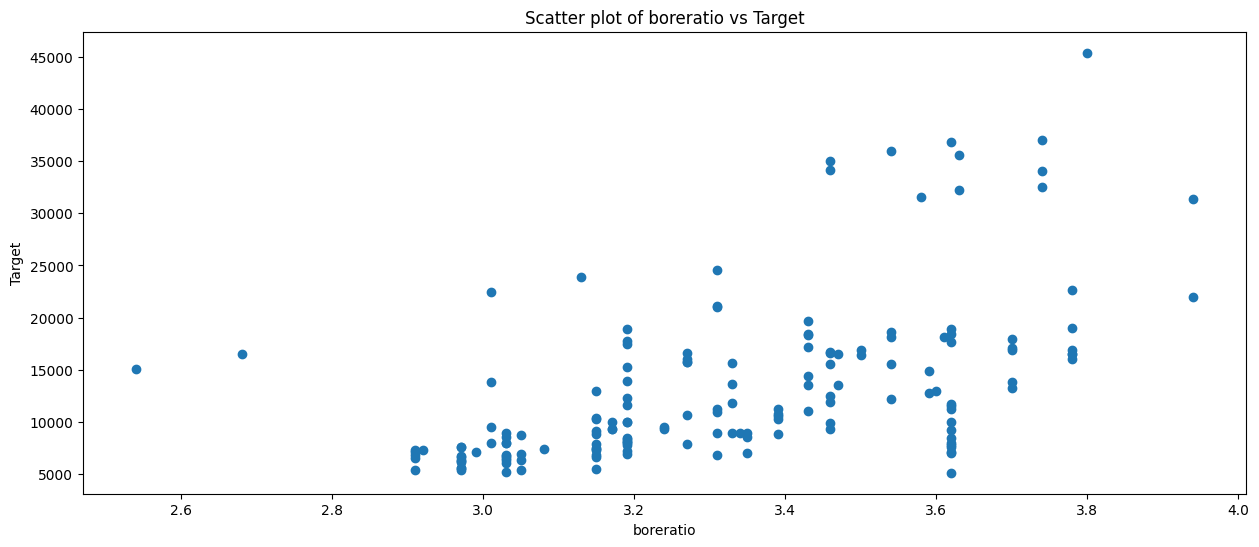

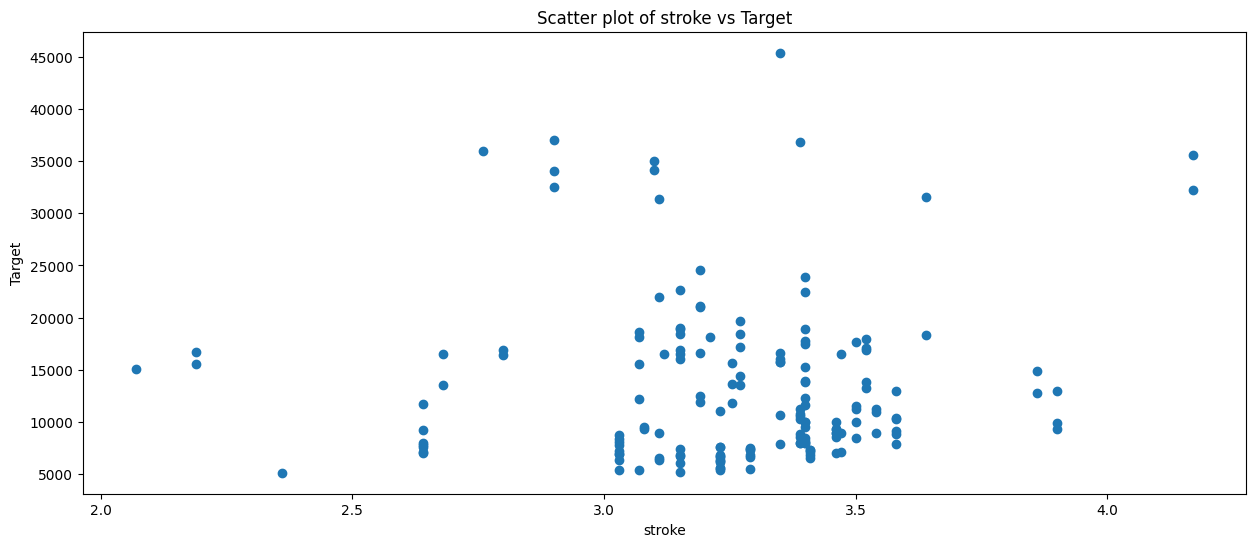

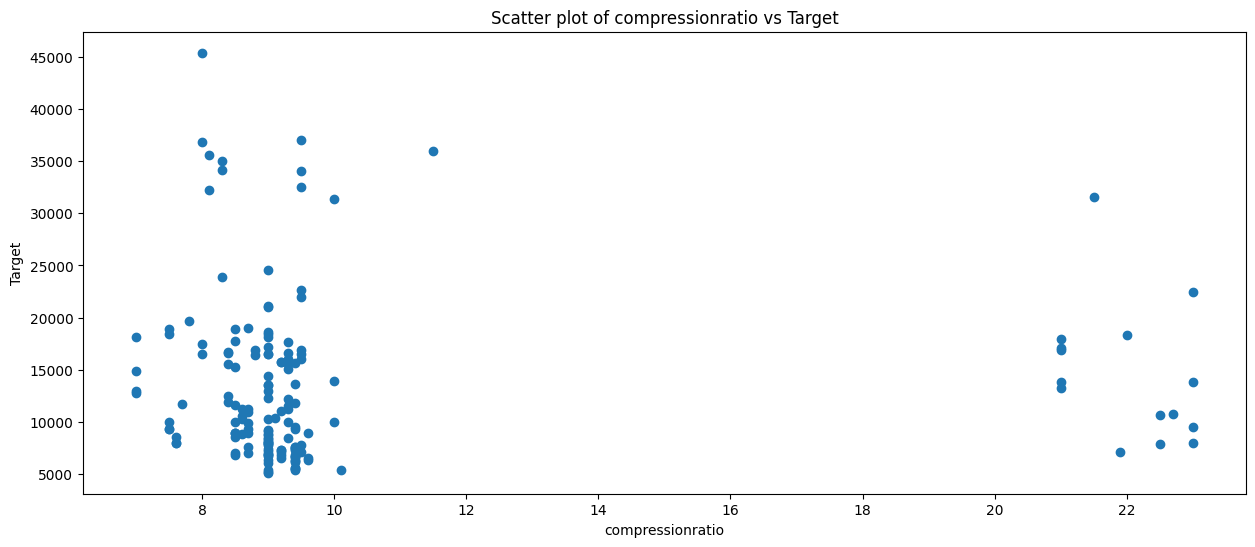

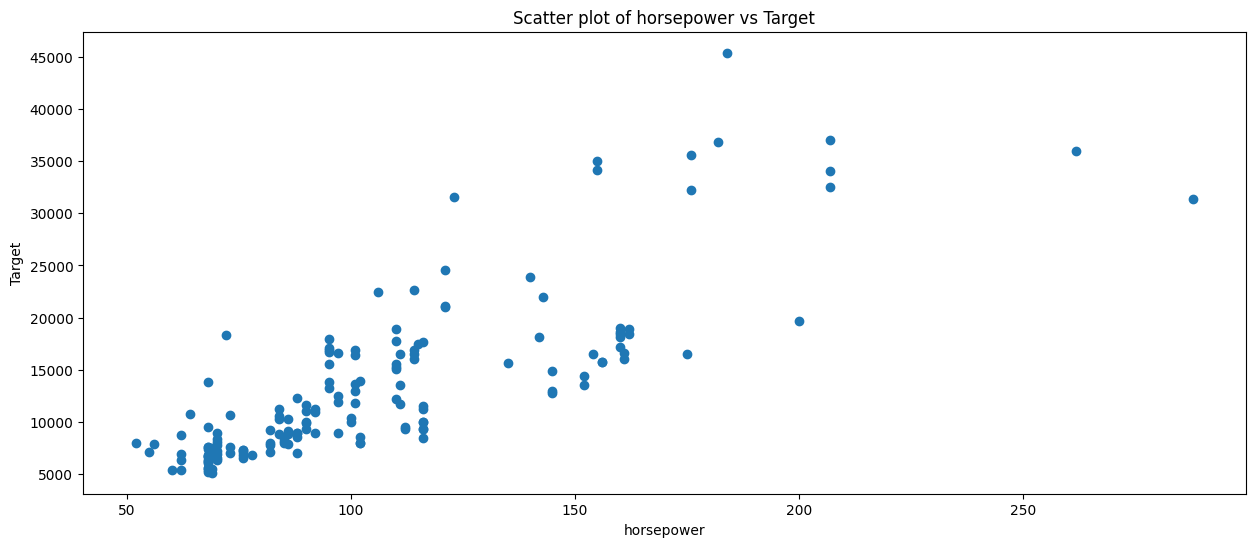

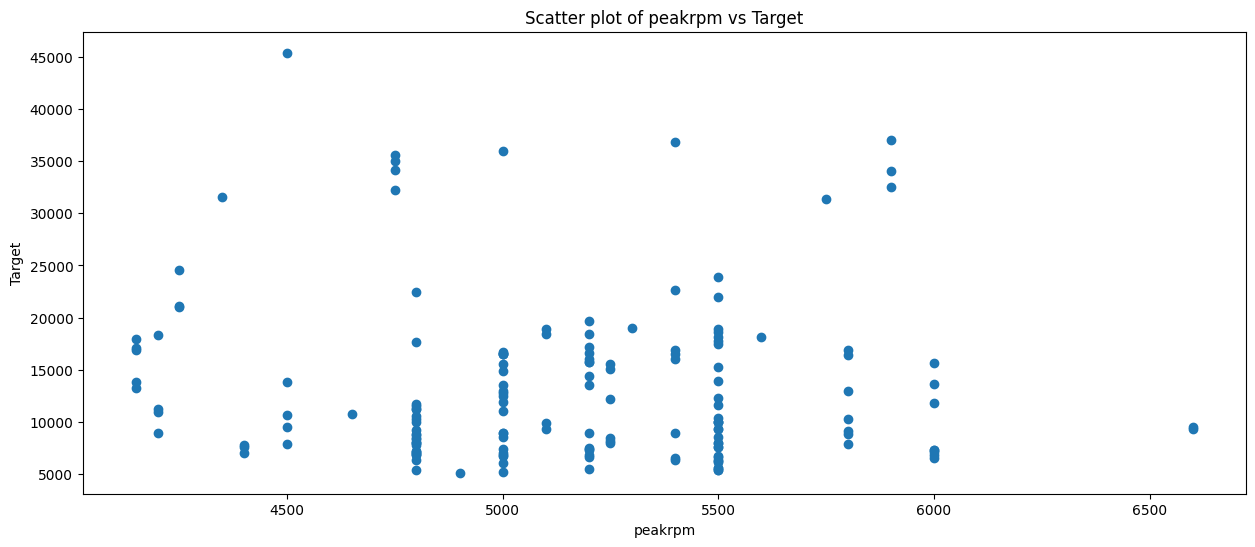

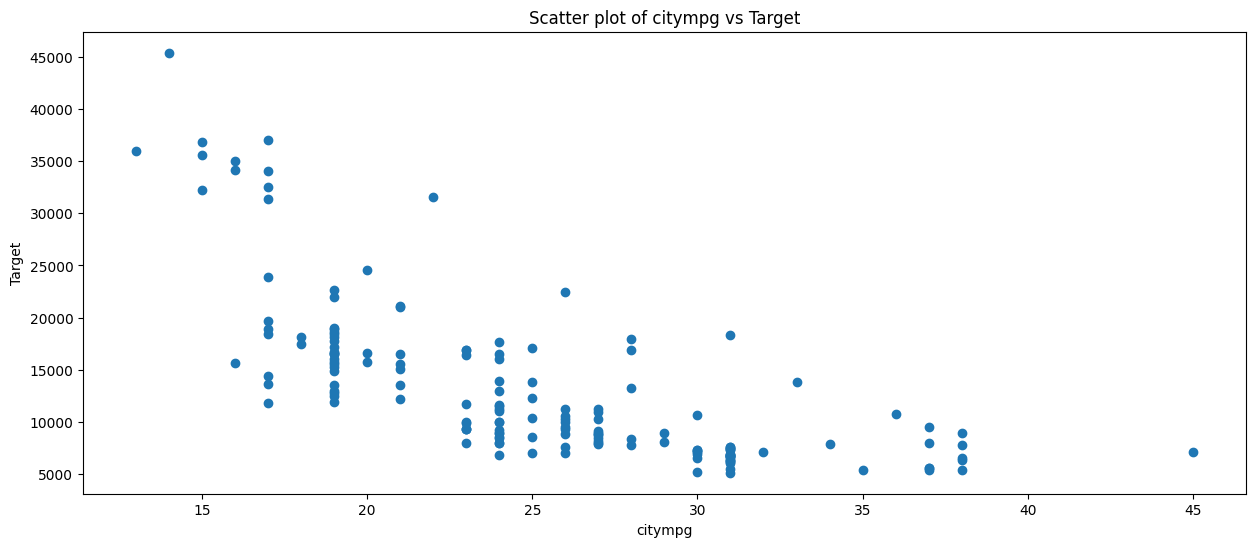

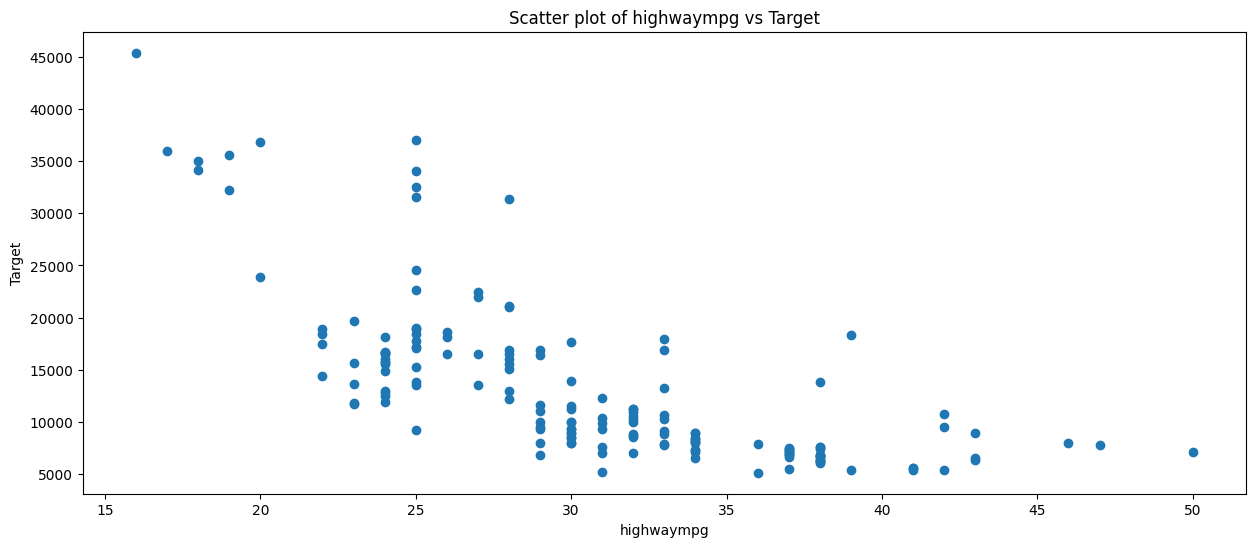

In [44]:
for cols in columns:
    plt.figure(figsize=(15, 6))
    plt.scatter(x_train[cols], y_train)
    plt.xlabel(cols)
    plt.ylabel("Target")
    plt.title(f"Scatter plot of {cols} vs Target")
    plt.show()

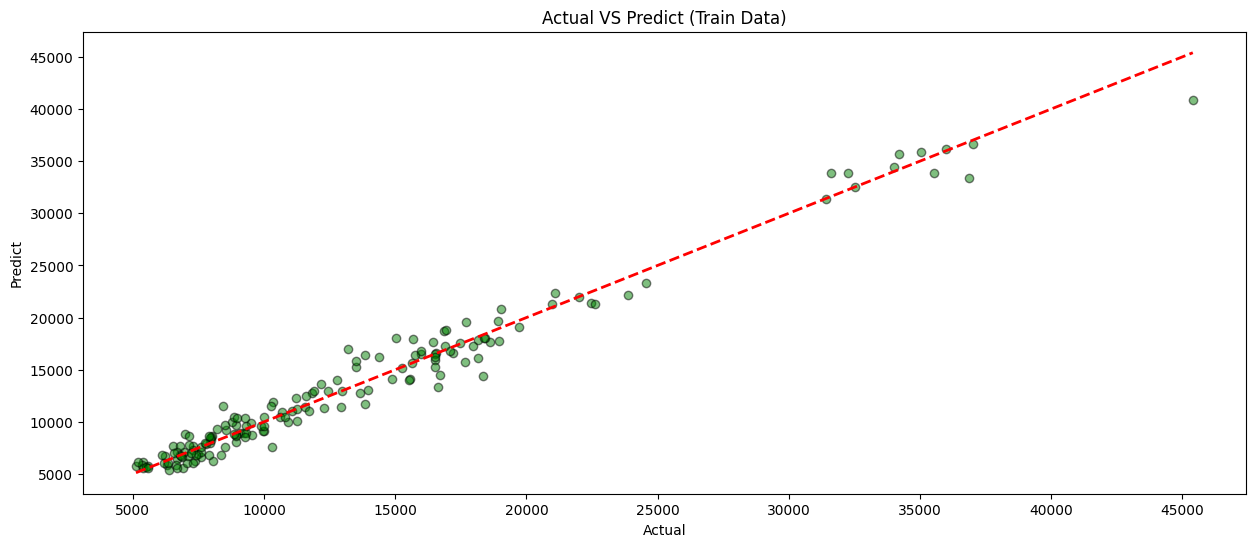

In [45]:
# Best Fit Line
plt.figure(figsize=(15, 6))
plt.scatter(y_train, train_prediction, color="green", edgecolors="k", alpha=.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.title("Actual VS Predict (Train Data)")
plt.show()

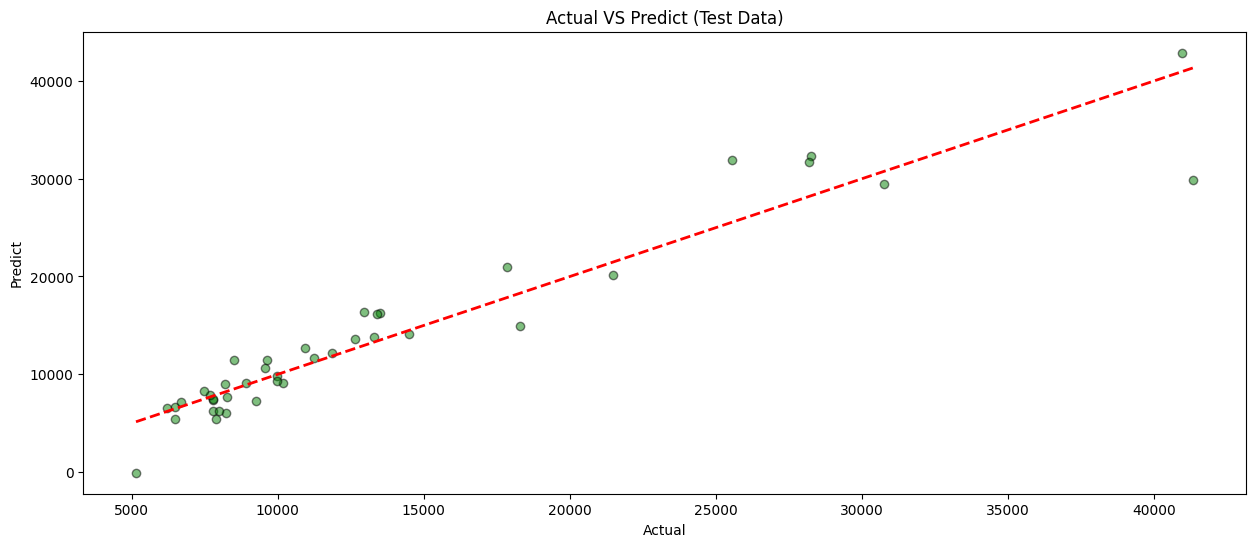

In [46]:
# Best Fit Line
plt.figure(figsize=(15, 6))
plt.scatter(y_test, test_prediction, color="green", edgecolors="k", alpha=.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.title("Actual VS Predict (Test Data)")
plt.show()

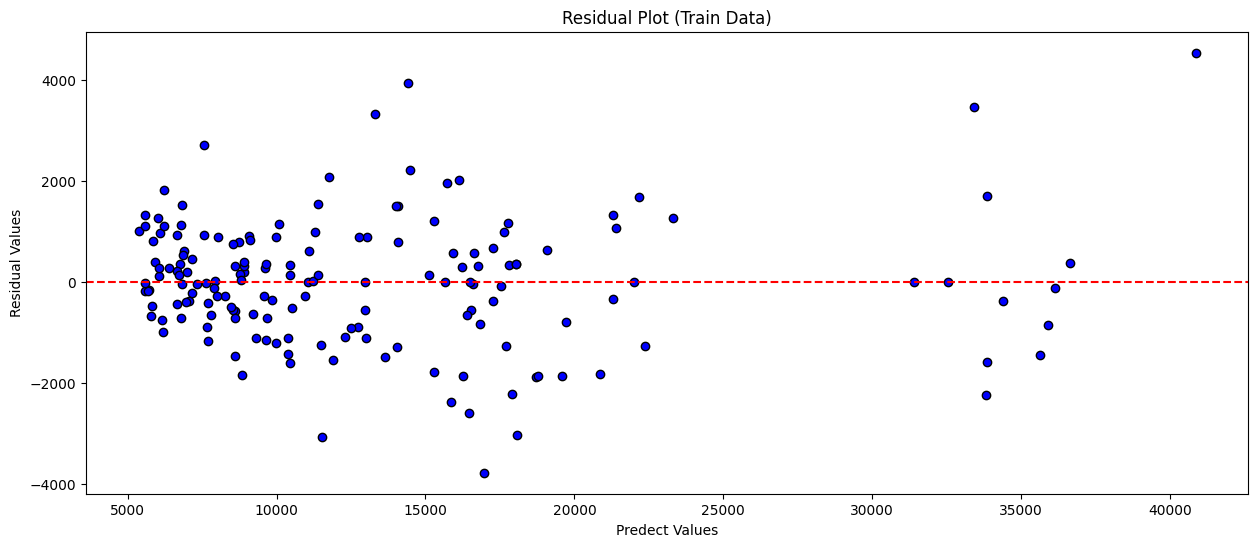

In [47]:
# Homoscedestacity Train Data
plt.figure(figsize=(15, 6))
plt.scatter(train_prediction, train_residuals, color="blue", edgecolors="k")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predect Values")
plt.ylabel("Residual Values")
plt.title("Residual Plot (Train Data)")
plt.show()

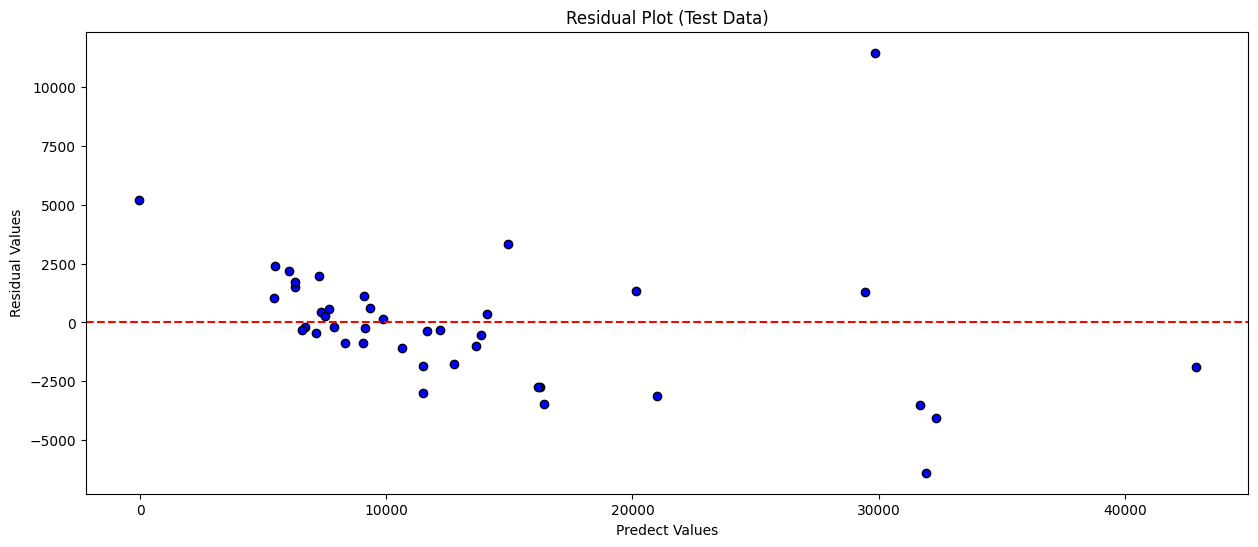

In [48]:
# Homoscedestacity Test Data
plt.figure(figsize=(15, 6))
plt.scatter(test_prediction, test_residuals, color="blue", edgecolors="k")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predect Values")
plt.ylabel("Residual Values")
plt.title("Residual Plot (Test Data)")
plt.show()

## Conclusion

In this project, we analyzed the car price dataset and built a machine learning model to predict car prices.

### Key Steps Completed:
- Loaded and cleaned the dataset  
- Performed exploratory data analysis (EDA)  
- Encoded categorical features using OneHotEncoder / OrdinalEncoder  
- Split the dataset into training and testing sets  
- Trained multiple regression models (Linear, Ridge, Lasso)  
- Evaluated the models using MAE, MSE, RMSE, and R² Score  

### Final Result:
Among all tested models, the one with the **best performance** (highest R² and lowest RMSE) can be considered the final model for predicting car prices.

This model can now be saved and deployed in a real-world application such as a web app or Hugging Face Space.